- Be sure current working directory is 'demo/' folder:

In [1]:
import os
os.getcwd()

'/home/ana/TFM'

- Import required functions:

In [2]:
from sahi.slicing import slice_coco
from sahi.utils.file import load_json

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## 1. Slicing COCO Dataset into Grids

- Visualize original image and annotations:

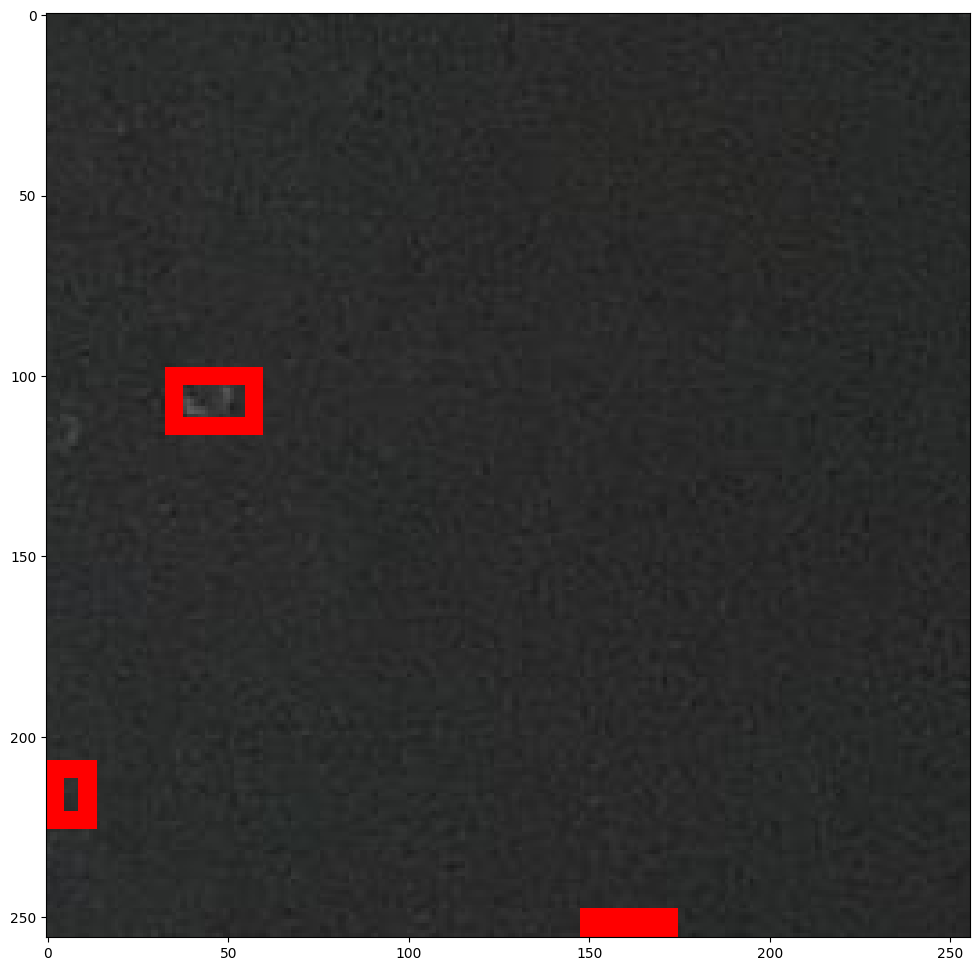

In [19]:
coco_dict = load_json('/home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/sliced_coco.json_coco.json')

# Configuramos la visualización
f, axarr = plt.subplots(1, 1, figsize=(12, 12))

# Seleccionamos el índice de la imagen que queremos leer
img_ind = 124  # Cambia este valor para seleccionar otra imagen
image_info = coco_dict["images"][img_ind]
image_file_name = image_info["file_name"]
image_path = f"/home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/{image_file_name}"

# Cargamos y mostramos la imagen
img = Image.open(image_path).convert('RGBA')

# Filtramos las anotaciones para esta imagen específica
image_id = image_info["id"]
annotations = [ann for ann in coco_dict["annotations"] if ann["image_id"] == image_id]

# Dibujamos cada anotación/bounding box sobre la imagen
for ann in annotations:
    xywh = ann["bbox"]
    xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]
    ImageDraw.Draw(img, 'RGBA').rectangle(xyxy, outline="red", width=5)

# Mostramos la imagen con las anotaciones
axarr.imshow(img)
plt.show()

- To slice a COCO dataset annoations an images, we need to specify slice parameters. In this example we will ice images into 256x256 grids overlap ratio of 0.2:

In [8]:
coco_dict, coco_path = slice_coco(
    coco_annotation_file_path="/home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/_annotations.coco.json",
    image_dir="/home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/",
    output_coco_annotation_file_name="sliced_coco.json",
    ignore_negative_samples=False,
    output_dir="/home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/",
    slice_height=256,
    slice_width=256,
    overlap_height_ratio=0.2,
    overlap_width_ratio=0.2,
    min_area_ratio=0.1,
    verbose=True
)

indexing coco dataset annotations...


  0%|          | 0/42 [00:00<?, ?it/s]05/06/2024 19:07:12 - INFO - sahi.slicing -   image.shape: (3024, 4032)
05/06/2024 19:07:12 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0168-1-_png.rf.29e00d9b10961c0a66cfa24796b38a21_0_0_256_256.png
05/06/2024 19:07:12 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0168-1-_png.rf.29e00d9b10961c0a66cfa24796b38a21_410_0_666_256.png
05/06/2024 19:07:12 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0168-1-_png.rf.29e00d9b10961c0a66cfa24796b38a21_1025_0_1281_256.png
05/06/2024 19:07:12 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0168-1-_png.rf.29e00d9b10961c0a66cfa24796b38a21_820_0_1076_256.png
05/06/2024 19:07:12 -

05/06/2024 19:07:42 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0193-1-_png.rf.d818bf82ee9f75efb1cba57270be097a_410_1025_666_1281.png
05/06/2024 19:07:42 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0042-4-_png.rf.f44feae13ccb786571a591f3713d4cf9_2255_3075_2511_3331.png
05/06/2024 19:07:42 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0042-4-_png.rf.f44feae13ccb786571a591f3713d4cf9_2460_3075_2716_3331.png
05/06/2024 19:07:42 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_reduccion_clases.v1i.coco/test/sliced/IMG_0042-4-_png.rf.f44feae13ccb786571a591f3713d4cf9_2665_3075_2921_3331.png
05/06/2024 19:07:42 - INFO - sahi.slicing -   sliced image path: /home/ana/TFM/datasets/desperfectos_moviles_r

- Visualize sliced images:

FileNotFoundError: [Errno 2] No such file or directory: '/home/ana/TFM/demo_data/sliced/IMG_0168-1-_png.rf.29e00d9b10961c0a66cfa24796b38a21_0_0_256_256.png'

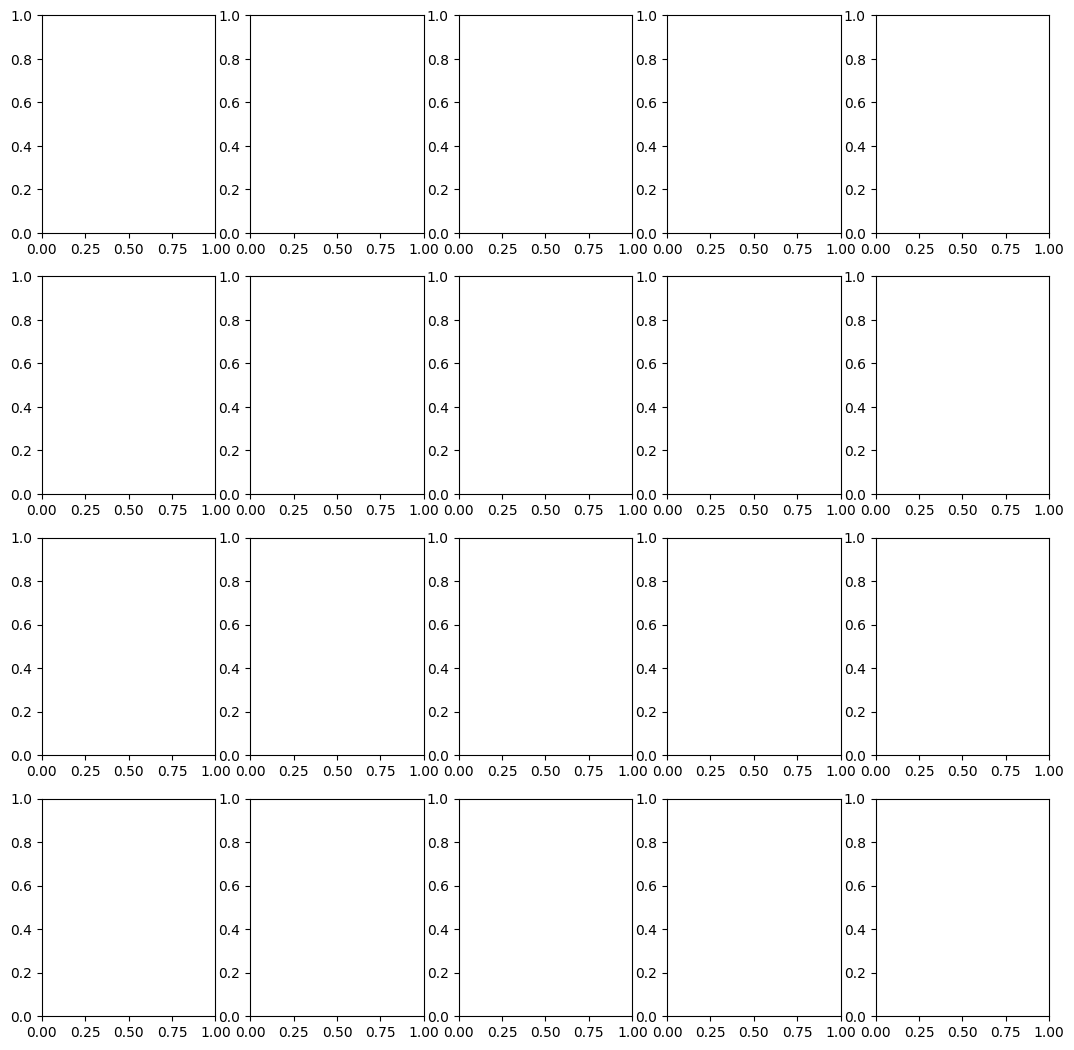

In [20]:
f, axarr = plt.subplots(4, 5, figsize=(13,13))
img_ind = 0
for ind1 in range(4):
    for ind2 in range(5):
        img = Image.open("demo_data/sliced/" + coco_dict["images"][img_ind]["file_name"])
        axarr[ind1, ind2].imshow(img)
        img_ind += 1

- Visualize sliced annotations on sliced images:

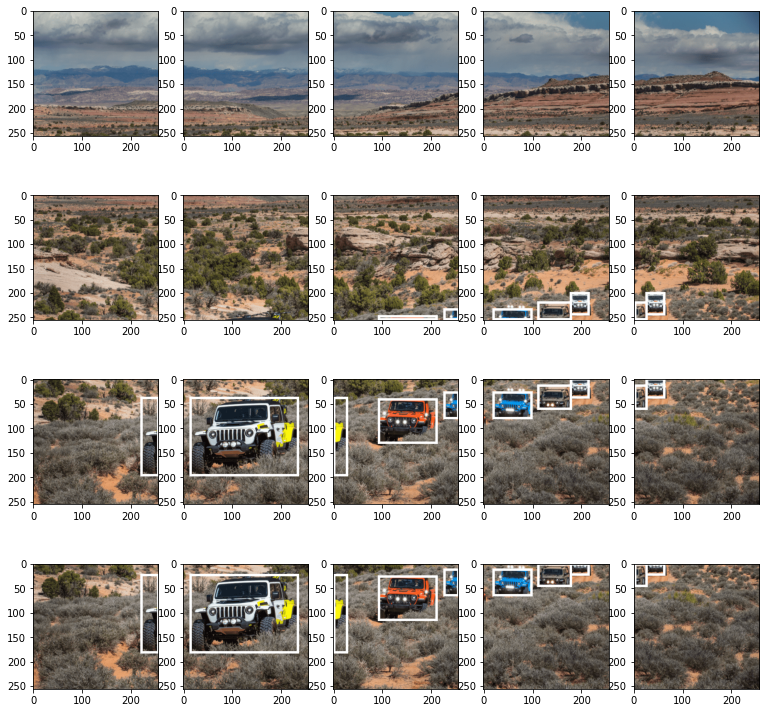

In [5]:
f, axarr = plt.subplots(4, 5, figsize=(13,13))
img_ind = 0
for row_ind in range(4):
    for column_ind in range(5):
        # read image
        img = Image.open("demo_data/sliced/" + coco_dict["images"][img_ind]["file_name"]).convert('RGBA')
        # iterate over all annotations
        for ann_ind in range(len(coco_dict["annotations"])):
            # find annotations that belong the selected image
            if coco_dict["annotations"][ann_ind]["image_id"] == coco_dict["images"][img_ind]["id"]:
                # convert coco bbox to pil bbox
                xywh = coco_dict["annotations"][ann_ind]["bbox"]
                xyxy = [xywh[0], xywh[1], xywh[0]+xywh[2], xywh[1]+xywh[3]]
                # visualize bbox over image
                ImageDraw.Draw(img, 'RGBA').rectangle(xyxy, width=5)
            axarr[row_ind, column_ind].imshow(img)
        img_ind += 1
